# Histograms
We'll learn how to create histograms using Matplotlib. When first evaluating a dataset, ``it's a common practice to create histograms to explore your data, as it can give you a general idea of what your data looks like``. 

***Histogram*** is a summary of the variation in a measured variable. It shows the number of samples that occur in a category. A histogram is a type of frequency distribution. Histograms work by binning the entire range of values into a series of intervals and then counting how many values fall into each interval. While the intervals are often of equal size, they're not required to be. 

If you look at our import statements, we have Matplotlib inline. We're going to import pandas as pd, as not only can we manipulate data with pandas, we'll see how to create a histogram using the plotting functionality of the Pandas library. We're also going to import matplotlib.pyplot as plt. And even though we'll be creating a histogram through the plotting functionality of the Pandas library, you can always use base matplotlib to tune your figure. 

In [2]:
import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

***Load Data***

The data that we'll use to demonstrate histograms is the house sales in King County USA dataset. We're going to load this data into a Pandas DataFrame by using pd.read_csv And as you can see, we have various features of a home in this data set. And what we'll be doing is visualizing a histogram of the price column. 

In [24]:
df =pd.read_csv('kingCountyHouseData.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***Histograms using Pandas***

To visualize, we can use the hist method. And as you can see, this is not very readable. 



In [25]:
df['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<Axes: >

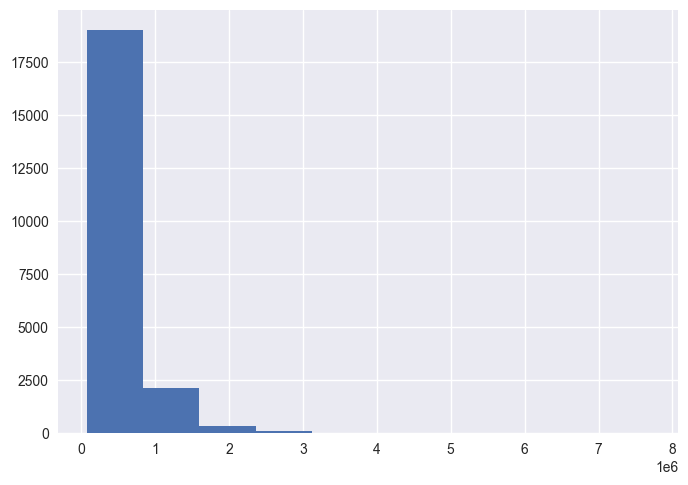

In [26]:
# Using the default settings is not a good idea
# Keep in mind that visualization are an iterative process.
df['price'].hist()

One way to fix this is by rotating our x tick labels. To do this, we can do plt.xticks and specify that we want the rotation to be 90 degrees. And as you can see, we no longer have our x tick labels overlapping. 


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 [Text(-1000000.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6'),
  Text(7000000.0, 0, '7'),
  Text(8000000.0, 0, '8'),
  Text(9000000.0, 0, '9')])

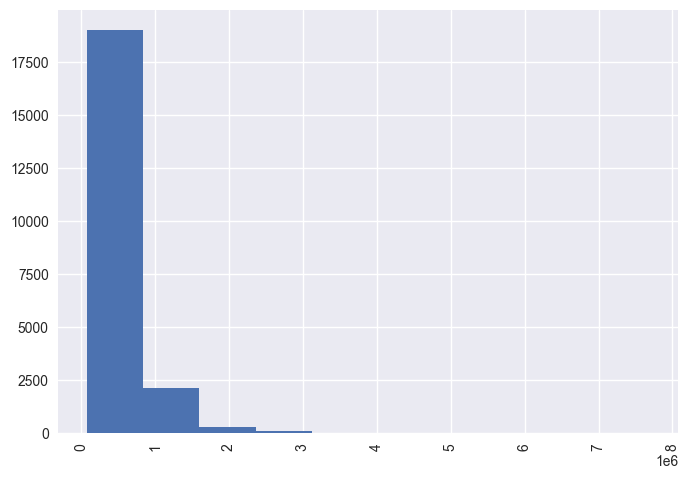

In [27]:
# One solution is to rotate your xticklabels
df['price'].hist()
plt.xticks(rotation =90)

Alternatively, you could have changed the default plot style, as oftentimes, different plot styles have different defaults. And in this case, we're specifying the plot style to be seaborn. And as you can see, we don't have overlapping x tick labels. One problem with our current visualization is that we seem to have a lot of white space. This is most likely due to outliers. 

In [29]:
# if you want a quick solution to make the xticklabels readable,
# try changing the plot style 
plt.style.use('seaborn-v0_8')

In [31]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

<Axes: >

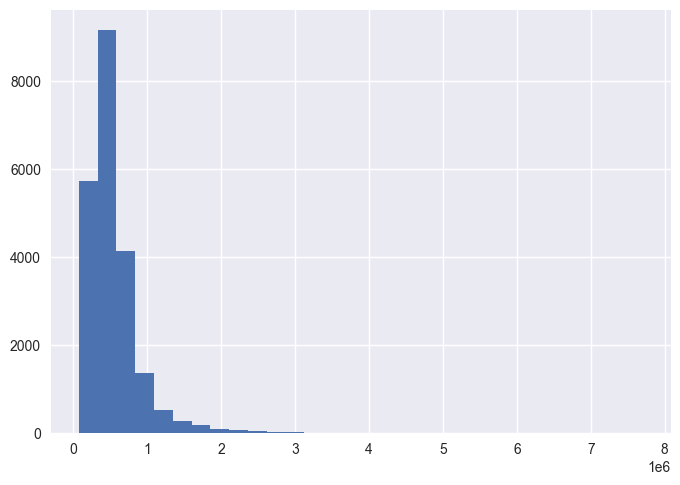

In [30]:
# Change the number of bins
# Seems better, but we still have empty spaces
df['price'].hist(bins =30)

Oftentimes, you're only interested in a subset of your data. Say for example, you're only interested in visualizing a subset of your data of homes under $3 million. To remove homes under $3 million, we're going to do df.loc and specifying that we want the price column and that we only want homes under $3 million. We're going to assign this Pandas series of true-false values to the variable price filter. From there, we can utilize our price filter by doing df.loc, inserting our filter of true and false values, specifying that we only want to look at the price column, and then creating a histogram off it. As you can see, we have less white space in our figure. 


<Axes: >

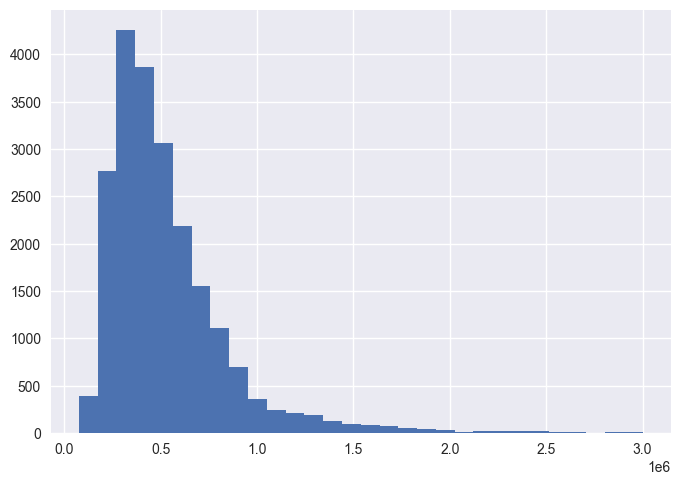

In [22]:
# visualizing a subset of the data
price_filter = df.loc[:, 'price'] <= 3000000
df.loc[price_filter, 'price'].hist(bins =30)

One important thing to keep in mind is that data visualization is an iterative process, so there's always something else you can tune. Say, for example, I want to be able to distinguish my bars from each other. You can do this by specifying the edge color. In this case, I want to be black. As you can see here, I can now distinguish my bars from each other. You can also keep on tuning your graph to be more and more visually appealing. Just make sure that it's worth the effort.

<Axes: >

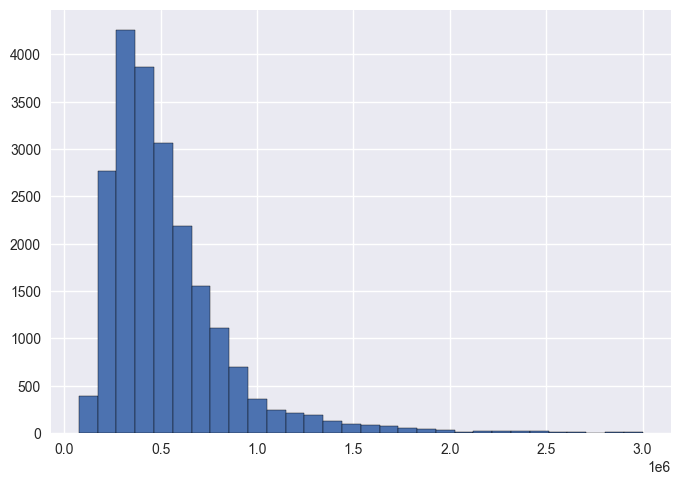

In [23]:
# you can change the edgecolor and linewidth
price_filter = df.loc[:, 'price'] <= 3000000


df.loc[price_filter, 'price'].hist(bins =30,
                                    edgecolor ='black')